# 06. Scikit-Learn

In [1]:
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

import sys
sys.path.append(r"d:\\Practice\\Machine Learning\\04.Logistic Regression")
print(sys.path)
from ML_basic_function import *

['d:\\Practice\\Machine Learning\\06.Scikit-Learn', 'd:\\CODE\\python311.zip', 'd:\\CODE\\DLLs', 'd:\\CODE\\Lib', 'd:\\CODE', '', 'd:\\CODE\\Lib\\site-packages', 'd:\\CODE\\Lib\\site-packages\\win32', 'd:\\CODE\\Lib\\site-packages\\win32\\lib', 'd:\\CODE\\Lib\\site-packages\\Pythonwin', 'd:\\\\Practice\\\\Machine Learning\\\\04.Logistic Regression']


> https://scikit-learn.org/stable/

> pip install --upgrade sklearn

- ### estimator

In [8]:
np.random.seed(21)   

features, labels = arrayGenReg(delta=0.01)

In [9]:
features

array([[-0.05196425, -0.11119605,  1.        ],
       [ 1.0417968 , -1.25673929,  1.        ],
       [ 0.74538768, -1.71105376,  1.        ],
       ...,
       [-1.0420798 ,  1.26783908,  1.        ],
       [-0.36983917, -0.79754462,  1.        ],
       [ 0.74680729, -0.48306156,  1.        ]])

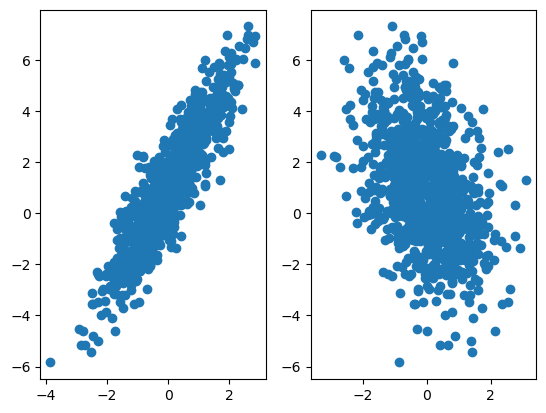

In [10]:
plt.subplot(121)
plt.plot(features[:, 0], labels, 'o')
plt.subplot(122)
plt.plot(features[:, 1], labels, 'o')

In [11]:
import sklearn

In [14]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [13]:
from sklearn import linear_model
linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression
LinearRegression

sklearn.linear_model._base.LinearRegression

> sklearn default object type is array

In [16]:
model = LinearRegression()
X = features[:, :2]           
y = labels           

In [17]:
model.fit(X,y)

LinearRegression()

In [18]:
model.coef_     # View independent variable parameters

array([[ 2.00050189, -0.99959249]])

In [19]:
model.intercept_    # View model intercepts

array([1.00041249])

In [20]:
model.predict(X)[:10]

array([[ 1.00760865],
       [ 4.34075612],
       [ 4.20191844],
       [ 0.8230561 ],
       [ 3.26988759],
       [-1.59942455],
       [ 4.91215239],
       [ 2.83254017],
       [ 1.06805459],
       [-1.61511773]])

In [21]:
y[:10]

array([[ 0.99114997],
       [ 4.35966992],
       [ 4.20516984],
       [ 0.82159789],
       [ 3.27169454],
       [-1.58377536],
       [ 4.92077279],
       [ 2.82358977],
       [ 1.04542851],
       [-1.60206122]])

In [22]:
from sklearn.metrics import mean_squared_error  # MSE

In [24]:
mean_squared_error(model.predict(X), y)

9.867694745982281e-05

In [25]:
l = model.coef_.flatten().tolist()
l.extend(model.intercept_.tolist())
l

[2.0005018943122757, -0.9995924879645381, 1.0004124888479367]

In [26]:
w = np.array(l).reshape(-1, 1)
w

array([[ 2.00050189],
       [-0.99959249],
       [ 1.00041249]])

In [27]:
MSELoss(features, w, y)     # compare with manual 

array([[9.86769475e-05]])

In [28]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

|Name|Description|      
|:--:|:--:|      
|fit_intercept|是否构建带有截距项的线性方程，默认为True|      
|normalize|是否进行归一化处理(6.2节进行详细介绍)|	      
|copy_X|建模时是否带入训练数据的副本|
|n_jobs|设置工作时参与计算的CPU核数|

In [29]:
model1 = LinearRegression(fit_intercept=False)
model1

LinearRegression(fit_intercept=False)

In [30]:
model1.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

In [31]:
model1.set_params(fit_intercept=True)

LinearRegression()

In [32]:
model.set_params(fit_intercept=False)

LinearRegression(fit_intercept=False)

In [33]:
model.coef_

array([[ 2.00050189, -0.99959249]])

In [34]:
model.intercept_

array([1.00041249])

In [35]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

In [36]:
model.coef_,model.intercept_

(array([[ 1.99228986, -1.0234348 ]]), 0.0)

In [37]:
model.rank_

2

In [38]:
model1.rank_

AttributeError: 'LinearRegression' object has no attribute 'rank_'

- ### basic function

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [5]:
X, y = load_iris(return_X_y=True)

In [6]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
iris_dataFrame = load_iris(as_frame=True)
iris_dataFrame.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [13]:
X = np.arange(12).reshape((6, 2))
y = np.array([0, 0, 0, 1, 1, 1])

In [14]:
train_test_split(X, y, random_state=21)

[array([[6, 7],
        [8, 9],
        [0, 1],
        [2, 3]]),
 array([[10, 11],
        [ 4,  5]]),
 array([1, 1, 0, 0]),
 array([1, 0])]

In [15]:
train_test_split(X, y, stratify=y, random_state=42)     # stratify=y 0, 1  1:1

[array([[ 2,  3],
        [10, 11],
        [ 0,  1],
        [ 8,  9]]),
 array([[6, 7],
        [4, 5]]),
 array([0, 1, 0, 1]),
 array([1, 0])]

- Standardization

In [16]:
from sklearn import preprocessing

In [17]:
preprocessing.scale?

Signature: preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to center and scale.

axis : {0, 1}, default=0
    Axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : bool, default=True
    If True, center the data before scaling.

with_std : bool, default=True
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : bool, default=True
    Set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSC matrix and if axis is 1).

Returns
-------
X_tr : {ndarray, spa

In [18]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
preprocessing.scale(X)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [20]:
z_score(X)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppor

In [23]:
scaler = StandardScaler()

In [24]:
X = np.arange(15).reshape(5, 3)
X_train, X_test = train_test_split(X)

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
scaler.scale_

array([2.44948974, 2.44948974, 2.44948974])

In [27]:
scaler.mean_

array([6., 7., 8.])

In [28]:
scaler.var_

array([6., 6., 6.])

In [29]:
scaler.n_samples_seen_

3

In [30]:
scaler.transform(X_train)

array([[ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487],
       [-1.22474487, -1.22474487, -1.22474487]])

In [31]:
scaler.transform(X_test)

array([[-2.44948974, -2.44948974, -2.44948974],
       [ 2.44948974,  2.44948974,  2.44948974]])

In [32]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [33]:
preprocessing.minmax_scale(X)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [34]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler?

Init signature: MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean,
unit variance scaling.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
feature_range : tuple (min, max), default=(0, 1)
    Desired range of transformed data.

copy : bool, default=True
    Set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array).

clip : bool, default=False
    Set to True to clip transformed values of held-out data to
    provided `feature range`.

In [35]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [36]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [37]:
scaler.data_min_

array([0., 1., 2.])

In [38]:
scaler.data_max_

array([12., 13., 14.])

> 针对稀疏矩阵的标准化（MaxAbsScaler）、针对存在异常值点特征矩阵的标准化（RobustScaler）、以及非线性变化的标准化（Non-linear transformation）

In [39]:
preprocessing.normalize?

Signature:
preprocessing.normalize(
    X,
    norm='l2',
    *,
    axis=1,
    copy=True,
    return_norm=False,
)
Docstring:
Scale input vectors individually to unit norm (vector length).

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to normalize, element by element.
    scipy.sparse matrices should be in CSR format to avoid an
    un-necessary copy.

norm : {'l1', 'l2', 'max'}, default='l2'
    The norm to use to normalize each non zero sample (or each non-zero
    feature if axis is 0).

axis : {0, 1}, default=1
    Define axis used to normalize the data along. If 1, independently
    normalize each sample, otherwise (if 0) normalize each feature.

copy : bool, default=True
    Set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSR matrix and if axis is 1).

return_norm : bool, def

- Normalization

In [40]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [41]:
preprocessing.normalize(X, norm='l1')

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

In [42]:
np.linalg.norm(X, ord=1, axis=1)

array([ 3., 12., 21., 30., 39.])

In [43]:
np.sum(X, axis=1)

array([ 3, 12, 21, 30, 39])

In [44]:
X / np.linalg.norm(X, ord=1, axis=1).reshape(5, 1)

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

In [45]:
preprocessing.normalize(X, norm='l2')

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [46]:
np.linalg.norm(X, ord=2, axis=1)

array([ 2.23606798,  7.07106781, 12.20655562, 17.3781472 , 22.56102835])

In [47]:
np.sqrt(np.sum(np.power(X, 2), axis=1))

array([ 2.23606798,  7.07106781, 12.20655562, 17.3781472 , 22.56102835])

In [48]:
X / np.linalg.norm(X, ord=2, axis=1).reshape(5, 1)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [49]:
np.linalg.norm(preprocessing.normalize(X, norm='l2'), ord=2, axis=1)

array([1., 1., 1., 1., 1.])

In [51]:
from sklearn.preprocessing import Normalizer
Normalizer?

Init signature: Normalizer(norm='l2', *, copy=True)
Docstring:     
Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one
non zero component is rescaled independently of other samples so
that its norm (l1, l2 or inf) equals one.

This transformer is able to work both with dense numpy arrays and
scipy.sparse matrix (use CSR format if you want to avoid the burden of
a copy / conversion).

Scaling inputs to unit norms is a common operation for text
classification or clustering for instance. For instance the dot
product of two l2-normalized TF-IDF vectors is the cosine similarity
of the vectors and is the base similarity metric for the Vector
Space Model commonly used by the Information Retrieval community.

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
norm : {'l1', 'l2', 'max'}, default='l2'
    The norm to use to normalize each non zero sample. If norm='max'
    is used, values will be re

In [52]:
normlize = Normalizer()
normlize.fit_transform(X)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [53]:
normlize = Normalizer(norm='l1')
normlize.fit_transform(X)

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
X, y = load_iris(return_X_y=True)

In [56]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [57]:
clf_test = LogisticRegression(max_iter=1000, multi_class='multinomial')

In [58]:
clf_test.fit(X, y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [59]:
clf_test.coef_

array([[-0.42323305,  0.96708868, -2.51670007, -1.08081498],
       [ 0.53421916, -0.3215795 , -0.20657535, -0.94373644],
       [-0.11098611, -0.64550918,  2.72327542,  2.02455142]])

In [60]:
clf_test.predict_proba(X)[:10]

array([[9.81581249e-01, 1.84187367e-02, 1.44954243e-08],
       [9.71333805e-01, 2.86661645e-02, 3.01802570e-08],
       [9.85272306e-01, 1.47276814e-02, 1.23353526e-08],
       [9.76061582e-01, 2.39383788e-02, 3.96903128e-08],
       [9.85231900e-01, 1.47680883e-02, 1.20018500e-08],
       [9.70216721e-01, 2.97832048e-02, 7.39869390e-08],
       [9.86769951e-01, 1.32300288e-02, 1.99809263e-08],
       [9.76146020e-01, 2.38539521e-02, 2.77244049e-08],
       [9.79623988e-01, 2.03759815e-02, 3.05945814e-08],
       [9.68765940e-01, 3.12340279e-02, 3.17134837e-08]])

In [61]:
clf_test.predict(X)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
clf_test.score(X, y)

0.9733333333333334

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y, clf_test.predict(X))

0.9733333333333334

- build ML pipeline

In [64]:
from sklearn.pipeline import make_pipeline
make_pipeline?

Signature: make_pipeline(*steps, memory=None, verbose=False)
Docstring:
Construct a :class:`Pipeline` from the given estimators.

This is a shorthand for the :class:`Pipeline` constructor; it does not
require, and does not permit, naming the estimators. Instead, their names
will be set to the lowercase of their types automatically.

Parameters
----------
*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step
    will never be cached, even if it is a transformer. By default, no
    caching is performed. If a string is given, it is the path to the
    caching directory. Enabling caching triggers a clone of the transformers
    before fitting. Therefore, the transformer instance given to the
    pipeline cannot be inspected directly. Use the attribute ``named_steps``
    or ``steps`` to inspect estima

In [65]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [ ]:
pipe.fit(X_train, y_train)

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [70]:
pipe.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2])

In [71]:
pipe.score(X_test, y_test)

0.9210526315789473

In [72]:
pipe.score(X_train, y_train)

0.9910714285714286

In [73]:
import joblib
joblib.dump?

Signature: joblib.dump(value, filename, compress=0, protocol=None, cache_size=None)
Docstring:
Persist an arbitrary Python object into one file.

Read more in the :ref:`User Guide <persistence>`.

Parameters
-----------
value: any Python object
    The object to store to disk.
filename: str, pathlib.Path, or file object.
    The file object or path of the file in which it is to be stored.
    The compression method corresponding to one of the supported filename
    extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
    automatically.
compress: int from 0 to 9 or bool or 2-tuple, optional
    Optional compression level for the data. 0 or False is no compression.
    Higher value means more compression, but also slower read and
    write times. Using a value of 3 is often a good compromise.
    See the notes for more details.
    If compress is True, the compression level used is 3.
    If compress is a 2-tuple, the first element must correspond to a string
    between suppo

In [ ]:
joblib.dump(pipe,'pipe.model')

In [ ]:
pipe1 = joblib.load('pipe.model')

- ### normalization and logistic parameters

In [1]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

- regularization (regularizer penalty term)

- over fitting

In [5]:
np.random.seed(123)

n_dots = 20
x = np.linspace(0, 1, n_dots)                       
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1 

y0 = x ** 2
np.polyfit(x, y0, 2)

p = np.poly1d(np.polyfit(x, y0, 2))

np.poly1d(np.polyfit(x, y, 3))

poly1d([ 1.90995297, -3.61611811,  2.6742144 ,  0.04912333])

In [6]:
def plot_polynomial_fit(x, y, deg):
    p = np.poly1d(np.polyfit(x, y, deg))
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')

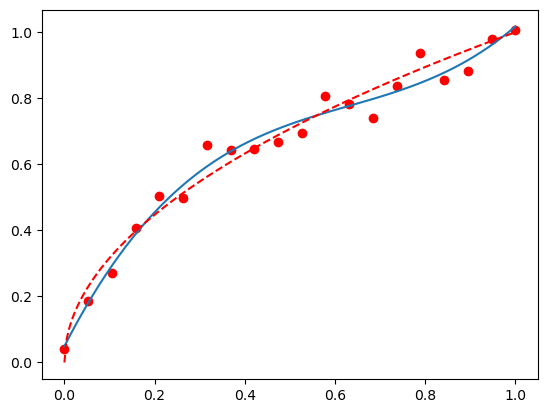

In [7]:
plot_polynomial_fit(x, y, 3)

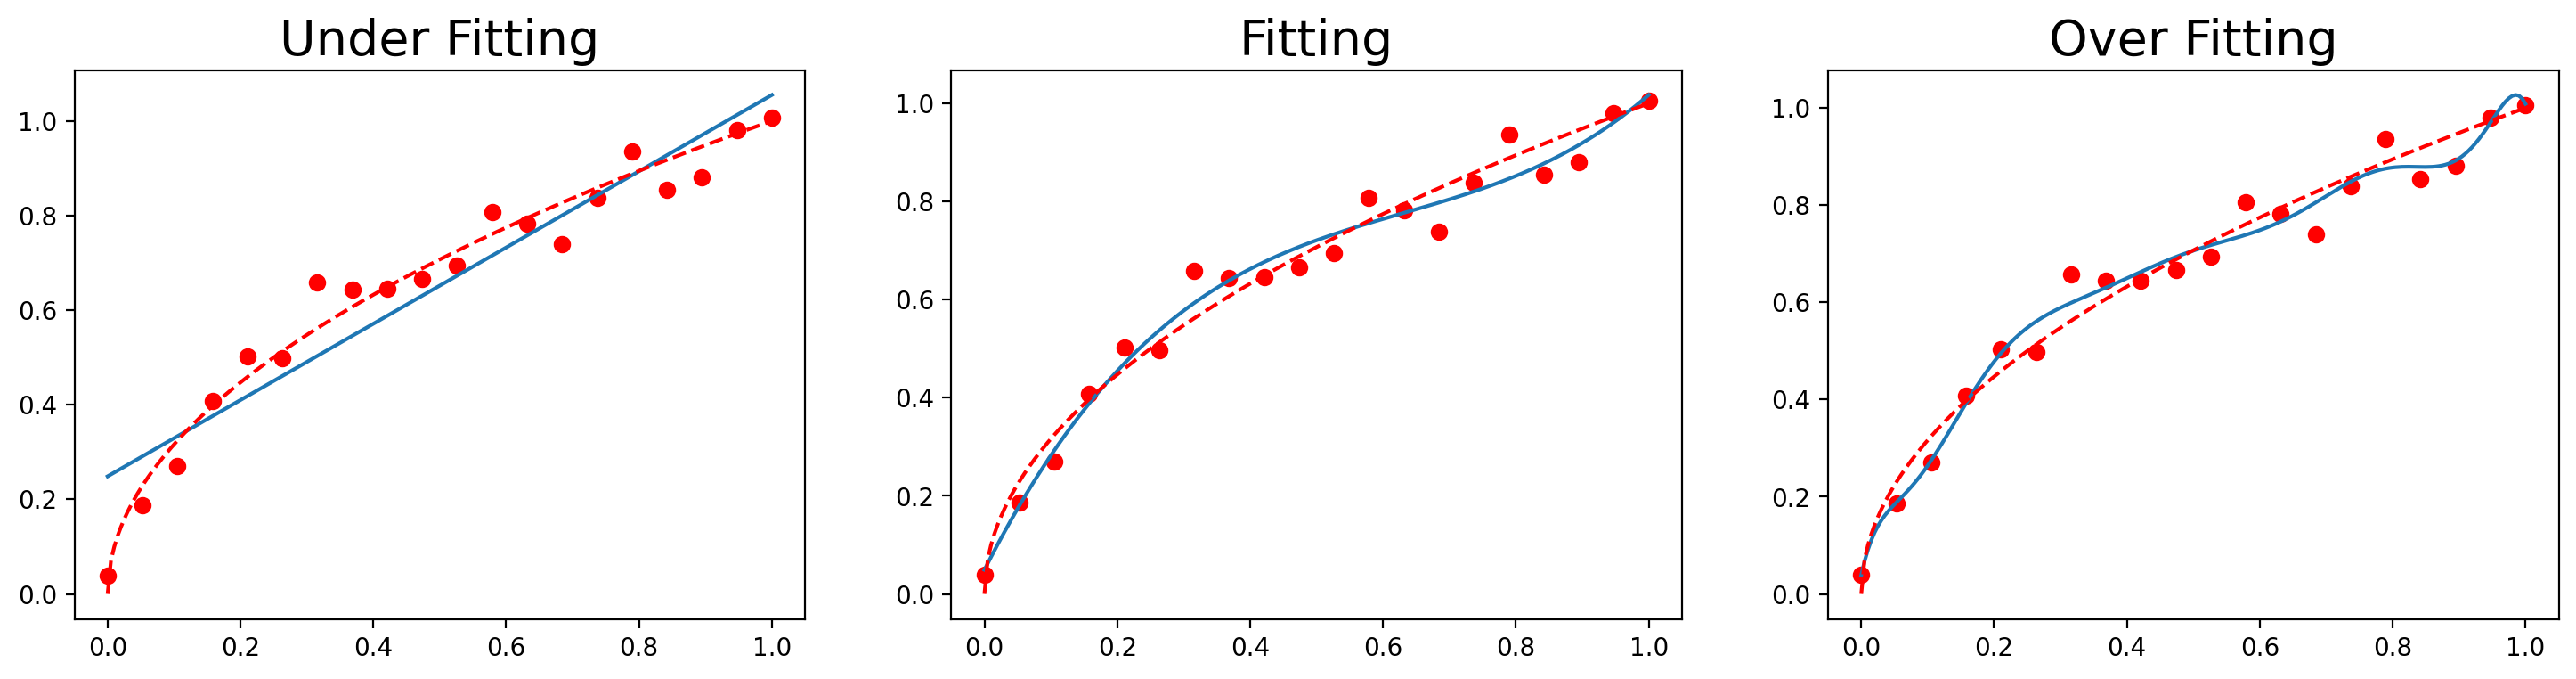

In [8]:
plt.figure(figsize=(18, 4), dpi=200)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
for index, deg in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    plot_polynomial_fit(x, y, deg)
    plt.title(titles[index], fontsize=20)

In [9]:
x_l = []

for i in range(10):
    x_temp = np.power(x, i+1).reshape(-1, 1)
    x_l.append(x_temp)

X = np.concatenate(x_l, 1)
X[:2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.26315789e-02, 2.77008310e-03, 1.45793847e-04, 7.67336039e-06,
        4.03861073e-07, 2.12558460e-08, 1.11872874e-09, 5.88804597e-11,
        3.09897157e-12, 1.63103767e-13]])

In [10]:
from sklearn.preprocessing import PolynomialFeatures

|Name|Description|      
|:--:|:--:|      
|degree|最高阶数|      
|interaction_only|是否只包含交叉项，交叉项指的是不同特征的乘结果|
|include_bias|是否只包含0阶计算结果、偏置项|
|计算模式|默认C模式，F模式能提高单独评估器计算效率，但会影响机器学习流中其他评估器|

In [11]:
x.reshape(-1, 1)[:2]

PolynomialFeatures(degree=2).fit_transform(x.reshape(-1, 1))[:2]

PolynomialFeatures(degree=2, interaction_only=True).fit_transform(x.reshape(-1, 1))[:2]

poly = PolynomialFeatures(degree = 10, include_bias=False)

poly.fit_transform(x.reshape(-1, 1))[:2]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.26315789e-02, 2.77008310e-03, 1.45793847e-04, 7.67336039e-06,
        4.03861073e-07, 2.12558460e-08, 1.11872874e-09, 5.88804597e-11,
        3.09897157e-12, 1.63103767e-13]])

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [13]:
lr.coef_

array([ 6.26103457e+00, -1.19764265e+02,  1.42603456e+03, -8.87839988e+03,
        3.20918671e+04, -7.14049022e+04,  9.93100740e+04, -8.41213555e+04,
        3.96752034e+04, -7.98404881e+03])

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(X), y)

0.0011726682228441361

Text(0.5, 1.0, '10-degree')

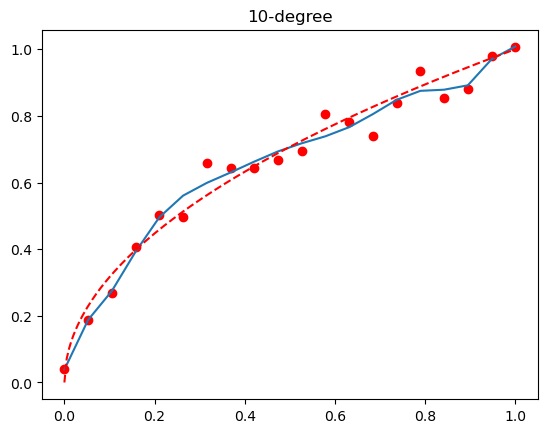

In [16]:
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'ro', x, lr.predict(X), '-', t, np.sqrt(t), 'r--')
plt.title('10-degree')

In [17]:
from sklearn.linear_model import Ridge,Lasso

In [18]:
# more parameters, simpler model, greater alpha penalty 
reg_rid = Ridge(alpha=0.005)
reg_rid.fit(X, y)
reg_rid.coef_

array([ 1.69951452e+00, -7.27654755e-01, -5.16601900e-01, -9.16814563e-02,
        1.44069563e-01,  2.10532895e-01,  1.77803630e-01,  9.77891137e-02,
        9.12868410e-04, -9.69907721e-02])

In [19]:
mean_squared_error(reg_rid.predict(X), y)

0.0021197020660902203

Text(0.5, 1.0, 'LinearRegression')

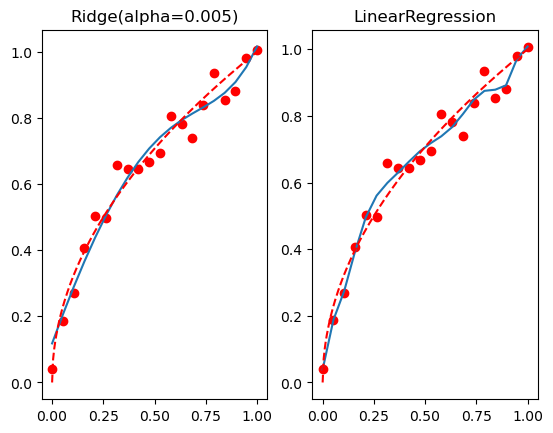

In [20]:
# penalty
t = np.linspace(0, 1, 200)
plt.subplot(121)
plt.plot(x, y, 'ro', x, reg_rid.predict(X), '-', t, np.sqrt(t), 'r--')
plt.title('Ridge(alpha=0.005)')
plt.subplot(122)
plt.plot(x, y, 'ro', x, lr.predict(X), '-', t, np.sqrt(t), 'r--')
plt.title('LinearRegression')

In [21]:
reg_las = Lasso(alpha=0.001)
reg_las.fit(X, y)
reg_las.coef_

array([ 1.10845364, -0.        , -0.37211179, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05080217])

In [22]:
mean_squared_error(reg_las.predict(X), y)

0.0040029178742938525

Text(0.5, 1.0, 'LinearRegression')

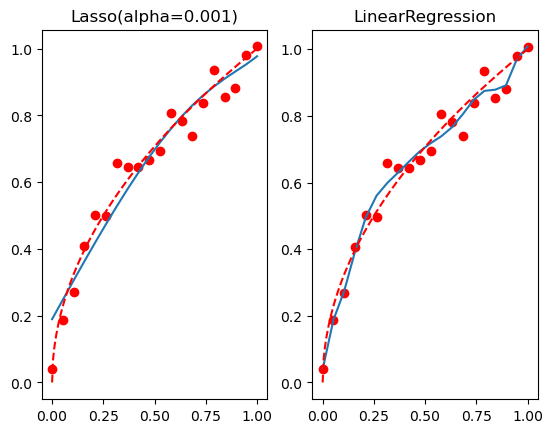

In [23]:
t = np.linspace(0, 1, 200)
plt.subplot(121)
plt.plot(x, y, 'ro', x, reg_las.predict(X), '-', t, np.sqrt(t), 'r--')
plt.title('Lasso(alpha=0.001)')
plt.subplot(122)
plt.plot(x, y, 'ro', x, lr.predict(X), '-', t, np.sqrt(t), 'r--')
plt.title('LinearRegression')

> Lasso's punishment is stronger and it quickly clears some parameters to zero. These cleared parameters mean that the corresponding parameters are not important in the actual modeling process, thus achieving the purpose of special importance screening. In the actual modeling process, l2 regularization is often used to alleviate the overfitting trend, while l1 regularization is often used in feature screening scenarios.

- Parameters & Attributes

|参数|解释|
|:--:|:--:|    
|penalty|正则化项|   
|dual|是否求解对偶问题*|
|tol|迭代停止条件：两轮迭代损失值差值小于tol时，停止迭代|
|C|经验风险和结构风险在损失函数中的权重|
|fit_intercept|线性方程中是否包含截距项|
|intercept_scaling|相当于此前讨论的特征最后一列全为1的列，当使用liblinear求解参数时用于捕获截距|
|class_weight|各类样本权重*|
|random_state|随机数种子|
|solver|损失函数求解方法*|
|max_iter|求解参数时最大迭代次数，迭代过程满足max_iter或tol其一即停止迭代|
|multi_class|多分类问题时求解方法*|
|verbose|是否输出任务进程|
|warm_start|是否使用上次训练结果作为本次运行初始参数|
|l1_ratio|当采用弹性网正则化时，$l1$正则项权重，就是损失函数中的$\rho$|

- dual：是否求解对偶问题

&emsp;&emsp;对偶问题是约束条件相反、求解方向也相反的问题，当数据集过小而特征较多时，求解对偶问题能一定程度降低运算复杂度，其他情况建议保留默认参数取值。

- class_weight:各类样本权重

&emsp;&emsp;class_weight其实代表各类样本在进行损失函数计算时的数值权重，例如假设一个二分类问题，0、1两类的样本比例是2:1，此时可以输入一个字典类型对象用于说明两类样本在进行损失值计算时的权重，例如输入:{0:1, 1:3}，则代表1类样本的每一条数据在进行损失函数值的计算时都会在原始数值上*3。而当我们将该参数选为`balanced`时，则会自动将这个比例调整为真实样本比例的反比，以达到平衡的效果。

- solver：损失函数求解方法

&emsp;&emsp;其实除了最小二乘法和梯度下降以外，还有非常多的关于损失函数的求解方法，而选择损失函数的参数，就是solver参数。

&emsp;&emsp;而当前损失函数到底采用何种优化方法进行求解，其实最终目的是希望能够更快（计算效率更高）更好（准确性更高）的来进行求解，而硬性的约束条件是损失函数的形态，此外则是用户自行选择的空间。

&emsp;&emsp;我们很难一次性将所有的优化方法一次性介绍完整，但我们可以给出何时应该用哪种solver的参考列表，也就是官网给出的列表：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs5dfa4trbj31580ew47m.jpg" alt="1" style="zoom:33%;" />

&emsp;&emsp;逻辑回归可选的优化方法包括：        
&emsp;&emsp;liblinear，这是一种坐标轴下降法，并且该软件包中大多数算法都有C++编写，运行速度很快，支持OVR+L1或OVR+L2；      
&emsp;&emsp;lbfgs，全称是L-BFGS，牛顿法的一种改进算法（一种拟牛顿法），适用于小型数据集，并且支持MVM+L2、OVR+L2以及不带惩罚项的情况；      
&emsp;&emsp;newton-cg，同样也是一种拟牛顿法，和lbfgs适用情况相同；      
&emsp;&emsp;sag，随机平均梯度下降，随机梯度下降的改进版，类似动量法，会在下一轮随机梯度下降开始之前保留一些上一轮的梯度，从而为整个迭代过程增加惯性，除了不支持L1正则化的损失函数求解以外（包括弹性网正则化）其他所有损失函数的求解；      
&emsp;&emsp;saga，sag的改进版，修改了梯度惯性的计算方法，使得其支持所有情况下逻辑回归的损失函数求解；

&emsp;&emsp;对于逻辑回归来说，求解损失函数的硬性约束其实就是多分类问题时采用的策略以及加入的惩罚项，所以大多数情况，我们会优先根据多分类问题的策略及惩项来选取优化算法，其次，如果有多个算法可选，那么我们可以根据其他情况来进行求解器的选取，如：

&emsp;&emsp;Penalize the intercept (bad)，如果要对截距项也进行惩罚，那只能选取liblinear；      
&emsp;&emsp;Faster for large datasets，如果需要对海量数据进行快速处理，则可以选取sag和saga；      
&emsp;&emsp;Robust to unscaled datasets，如果未对数据集进行标准化，但希望维持数据集的鲁棒性（迭代平稳高效），则可以考虑使用liblinear、lbfgs和newton-cg三种求解方法。

- multi_class：选用何种方法进行多分类问题求解

&emsp;&emsp;可选OVR和MVM，当然默认情况是auto，此时模型会优先根据惩罚项和solver选择OVR还是MVM，但一般来说，MVM效果会好于OVR。

- ### Basic theory of machine learning parameter adjustment and grid search

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
from sklearn.model_selection import GridSearchCV

|Name|Description|      
|:--:|:--:|      
|estimator|调参对象，某评估器|      
|param_grid|参数空间，可以是字典或者字典构成的列表，稍后介绍参数空间的创建方法|	      
|scoring|评估指标，支持同时输出多个参数|
|n_jobs|设置工作时参与计算的CPU核数|
|iid|交叉验证时各折数据是否独立，该参数已在0.22版中停用，将在0.24版中弃用，此处不做介绍|
|refit|挑选评估指标和最佳参数，在完整数据集上进行训练|
|cv|交叉验证的折数|
|verbose|输出工作日志形式|
|pre_dispatch|多任务并行时任务划分数量|
|error_score|当网格搜索报错时返回结果，选择'raise'时将直接报错并中断训练过程，其他情况会显示警告信息后继续完成训练|
|return_train_score|在交叉验证中是否显示训练集中参数得分|

In [26]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [27]:
clf = LogisticRegression(max_iter=int(1e6), solver='saga')

In [28]:
param_grid_simple = {'penalty': ['l1', 'l2'],
                     'C': [1, 0.5, 0.1, 0.05, 0.01]}

In [29]:
param_grid_ra = [
    {'penalty': ['l1', 'l2'], 'C': [1, 0.5, 0.1, 0.05, 0.01]}, 
    {'penalty': ['elasticnet'], 'C': [1, 0.5, 0.1, 0.05, 0.01], 'l1_ratio': [0.3, 0.6, 0.9]}
]

In [30]:
search = GridSearchCV(estimator=clf,
                      param_grid=param_grid_simple)

In [32]:
search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000000, solver='saga'),
             param_grid={'C': [1, 0.5, 0.1, 0.05, 0.01],
                         'penalty': ['l1', 'l2']})

In [33]:
search.best_estimator_

LogisticRegression(C=1, max_iter=1000000, penalty='l1', solver='saga')

In [34]:
search.best_estimator_.coef_

array([[ 0.        ,  0.        , -3.39856721,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.94192868,  0.        ,  4.32192754,  2.59617203]])

In [35]:
search.best_estimator_.score(X_train,y_train),search.best_estimator_.score(X_test,y_test)

(0.9910714285714286, 0.9210526315789473)

In [36]:
search.best_estimator_.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
search.best_score_

0.9913043478260869

In [38]:
search.cv_results_

{'mean_fit_time': array([0.11127915, 0.03550758, 0.07403393, 0.03508158, 0.0133523 ,
        0.01953444, 0.0051239 , 0.01474915, 0.00102592, 0.00716767]),
 'std_fit_time': array([0.03033914, 0.00416253, 0.00845576, 0.00407049, 0.00275133,
        0.00307701, 0.00162576, 0.00337735, 0.00128912, 0.00344518]),
 'mean_score_time': array([0.00286264, 0.00073304, 0.00107174, 0.00247297, 0.00124421,
        0.00195436, 0.00080862, 0.00041471, 0.00036454, 0.00014343]),
 'std_score_time': array([0.00202836, 0.00094088, 0.00168531, 0.00311902, 0.00162608,
        0.00242186, 0.00099047, 0.00050791, 0.00072908, 0.00028687]),
 'param_C': masked_array(data=[1, 1, 0.5, 0.5, 0.1, 0.1, 0.05, 0.05, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              m

In [39]:
search.best_params_

{'C': 1, 'penalty': 'l1'}

In [40]:
search.best_index_

0

In [41]:
search.n_splits_

5

In [42]:
search.refit_time_

0.13716340065002441

- ### construct a search space with ML flow

In [3]:
np.random.seed(21)
X = np.random.normal(0, 1, size=(1000, 2))
y = np.array(X[:,0]+X[:, 1]**2 < 1.5, int)

In [4]:
np.random.seed(21)
for i in range(200):
    y[np.random.randint(1000)] = 1
    y[np.random.randint(1000)] = 0

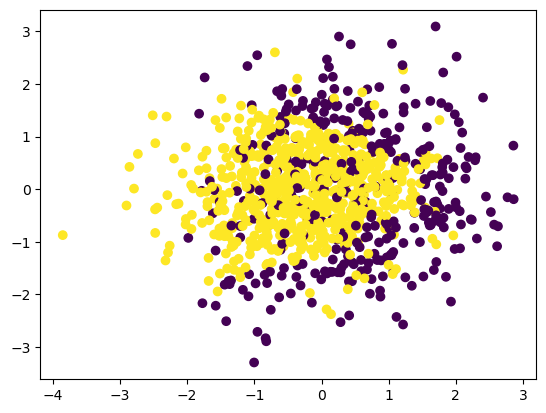

In [5]:
plt.scatter(X[:, 0], X[:, 1],c=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=21) 

In [7]:
pipe = make_pipeline(PolynomialFeatures(), 
                     StandardScaler(), 
                     LogisticRegression(max_iter=int(1e6)))

In [8]:
pipe.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(max_iter=1000000))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=1000000),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2'

In [9]:
param_grid = [
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['l1'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__solver': ['saga']}, 
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['l2'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['elasticnet'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__l1_ratio': np.arange(0.1, 1, 0.1).tolist(), 'logisticregression__solver': ['saga']}
]

In [12]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score?

In [13]:
from sklearn.metrics import make_scorer

acc = make_scorer(roc_auc_score)

GridSearchCV(estimator=pipe,
             param_grid=param_grid,
             scoring=acc)

GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000000))]),
             param_grid=[{'logisticregression__C': [0.1, 0.2,
                                                    0.30000000000000004, 0.4,
                                                    0.5, 0.6,
                                                    0.7000000000000001, 0.8,
                                                    0.9, 1.0, 1.1,
                                                    1.2000000000000002,
                                                    1.3000000000000003,
                                                    1.4000000000000001...
                                                    1.4000000000000001,
                                                    1.5000000000000002, 1.6,
                                                    1.7000000000000002,
                                                    1.8000000000000003,
                                                    1.9000000000000001],
                          'logisticregression__l1_ratio': [0.1, 0.2,
                                                           0.30000000000000004,
                                                           0.4, 0.5, 0.6,
                                                           0.7000000000000001,
                                                           0.8, 0.9],
                          'logisticregression__penalty': ['elasticnet'],
                          'logisticregression__solver': ['saga'],
                          'polynomialfeatures__degree': [2, 3, 4, 5, 6, 7, 8,
                                                         9]}],
             scoring=make_scorer(roc_auc_score))

In [ ]:
{'AUC': make_scorer(roc_auc_score), 'Accuracy': 'accuracy'}

In [ ]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [ ]:
search = GridSearchCV(estimator=clf,
                      param_grid=param_grid_simple,
                      scoring=scoring,
                      refit='Accuracy')

In [ ]:
{'AUC': make_scorer(roc_auc_score), 'Accuracy': 'accuracy'}

- modeling

In [ ]:
pipe = make_pipeline(PolynomialFeatures(), 
                     StandardScaler(), 
                     LogisticRegression(max_iter=int(1e6)))

In [ ]:
param_grid = [
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['l1'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__solver': ['saga']}, 
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['l2'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
    {'polynomialfeatures__degree': np.arange(2, 10).tolist(), 'logisticregression__penalty': ['elasticnet'], 'logisticregression__C': np.arange(0.1, 2, 0.1).tolist(), 'logisticregression__l1_ratio': np.arange(0.1, 1, 0.1).tolist(), 'logisticregression__solver': ['saga']}
]

In [ ]:
search = GridSearchCV(estimator=pipe,
                      param_grid=param_grid, 
                      scoring='roc_auc', 
                      n_jobs=5)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
accuracy_score(search.best_estimator_.predict(X_train), y_train)

In [ ]:
accuracy_score(search.best_estimator_.predict(X_test), y_test)

- ### The macro and weighted process of multi-classification evaluation indicators

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
y_true = np.array([1, 0, 0, 1, 0, 1])
y_pred = np.array([1, 1, 0, 1, 0, 1])

In [42]:
precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

(0.75, 1.0, 0.8571428571428571)

In [43]:
precision_score?

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    exclud

|Name|Description|      
|:--:|:--:| 
|y_true|数据集真实标签| 
|y_pred|标签预测结果|
|labels|允许以列表形式输入其他形态的标签，一般不进行修改|
|pos_label|positive类别标签|
|average|多分类时指标计算方法|
|sample_weight|不同类别的样本权重|
|zero_division|当分母为0时返回结果|

In [45]:
y_true = np.array([0, 1, 2, 2, 0, 1, 1, 2, 0, 2])
y_pred = np.array([0, 1, 0, 2, 2, 1, 2, 2, 0, 2])

tp1 = 2
tp2 = 2
tp3 = 3

fn1 = 1
fn2 = 1
fn3 = 1

re1 = 2/3
re2 = 2/3
re3 = 3/4

In [46]:
np.mean([re1, re2, re3])

0.6944444444444443

In [47]:
recall_score(y_true, y_pred, average='macro')

0.6944444444444443

In [48]:
re1 * 3/10 + re2 * 3/10 + re3 * 4/10

0.7

In [49]:
recall_score(y_true, y_pred, average='weighted')

0.7

In [50]:
tp = tp1 + tp2 + tp3
fn = fn1 + fn2 + fn3
tp / (tp+fn)

0.7

In [51]:
recall_score(y_true, y_pred, average='micro')

0.7

- ### RUC-AUC

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
y_true = np.array([1, 0, 0, 1, 0, 1])
y_pred = np.array([0.9, 0.7, 0.2, 0.7, 0.4, 0.8])   # model probability prediction result 

In [54]:
roc_auc_score(y_true, y_pred)

0.9444444444444444

In [55]:
y_true = np.array([1, 0, 0, 1, 0, 1])
y_pred = np.array([1, 1, 0, 1, 0, 1])   # classification

In [56]:
roc_auc_score(y_true, y_pred)

0.8333333333333334

In [57]:
roc_auc_score?

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)     from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
     

|Name|Description|      
|:--:|:--:| 
|max_fpr|fpr最大值，fpr是roc曲线的横坐标| 
|multi_class|分类器在进行多分类时进行的多分类问题处理策略|